### Notebook 2_3

## Sine Input into System

#### Student Learning Outcomes
* Learn the sine response of the first order system.
* Learn how to calculate the steady state response of the first order system.

--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: A Long Way to Derive</h2>
</div>

Let's study a general problem:

Given a sine input:
$$x(t)=A\sin(\omega t)$$
The system is first-order. The transfer function can be written as:
$$H(s)=\frac{b}{s+a}$$
What will be the system output:
$$y(t)=??$$

Such problem setting is similar as what you learned before Midterm 1 -- Perhaps we can use Laplace Transform to solve it?

----------

But, what is the Laplace Transform for $x(t)=A\sin(\omega t)$?

Recall from last week, you learned such expression: 

$$x(t)=A\sin(\omega t) = x(t)=A\frac{e^{j(\omega t)} - e^{-j(\omega t )}}{2j} $$

And you can break down the input into 2 separate terms, solely study their output, then add their output together as final output.

That is:

$$x(t)=\frac{A}{2j}(x_1(t)+x_2(t))$$
$$x_1(t) = e^{j(\omega t)}$$
$$x_2(t) = e^{-j(\omega t)}$$

Now the $x_1(t)$ and $x_2(t)$ are in simple form. And you can use Laplace Transform to derive their solution, $y_1(t)$ and $y_2(t)$, respectively.

And finally, combine as:

<div style="border-left: 4px solid #FF0000; padding: 10px; background-color: #FFE5E5;">
<strong>[!CRITICAL]</strong> This is a critical note.
</div>

**correction: This is wrong, I mistakely wrote the sign**

$$y(t)=\frac{A}{2j}(y_1(t)+y_2(t))$$

**It should be changed to:**

$$y(t)=\frac{A}{2j}(y_1(t)-y_2(t))$$
It may take some time for us to do it. Let's use ChatGPT to help us finish such job.

------------
> Copy and Paste these into ChatGPT:
```markdown
given $$e^{j(\omega t)}$$ as input, go thru a first order system in transfer function b/(s+a). Derive the output of the system. Show full result, not only steady state. Show full procedures, including partial fraction.
```
----------

Speed some time reading how ChatGPT solved it. Then, write the final answer:

$$y_1(t) = \frac{b}{-a - j\omega} e^{-at} + \frac{b}{j\omega + a} e^{j\omega t}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>final answer: 0.5 pt</strong>
</span>

------------
> Copy and Paste these into ChatGPT:
```markdown
given $$e^{-j(\omega t)}$$ as input, go thru a first order system in transfer function b/(s+a). Derive the output of the system. Show full result, not only steady state. Show full procedures, including partial fraction.
```
----------

Speed some time reading how ChatGPT solved it. Then, write the final answer:

$$y_2(t) = \frac{b}{-a + j\omega} e^{-at} + \frac{b}{a - j\omega} e^{-j\omega t}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>final answer: 0.5 pt</strong>
</span>

Then let ChatGPT to help us merge the two outputs $y_1(t)$ and $y_2(t)$ as final output. Write the final answer:

$$y(t) =\frac{A}{2j}( y_1(t) - y_2(t) )= \frac{A}{2j}\left[ \left( \frac{b}{-a - j\omega} e^{-at} + \frac{b}{j\omega + a} e^{j\omega t} \right)- \left(\frac{b}{-a + j\omega} e^{-at} + \frac{b}{a - j\omega} e^{-j\omega t}\right) \right]$$

$$y(t) =\underbrace{\frac{A}{2j}\left( \frac{b}{-a - j\omega} - \frac{b}{-a + j\omega} \right) e^{-at}}_{\text{Transient Response}}+\underbrace{\frac{A}{2j}\left( \frac{b}{j\omega + a} e^{j\omega t} - \frac{b}{a - j\omega} e^{-j\omega t} \right)}_{\text{Steady-State Response}}$$


------------
> Copy and Paste these into ChatGPT, fill two ?? with your previous results:
```markdown
given $y_1(t) = ??$$, $y_2(t) = ??$, help me derive this result: $y(t)=\frac{A}{2j}(y_1(t)-y_2(t)).Try best to organize terms. Merge the steady-state part as a single sine term.
```
----------

$$y(t) = \underbrace{\frac{A}{2j}\Bigl(\tfrac{b}{-a - j\omega} - \tfrac{b}{-a + j\omega}\Bigr)\,e^{-\,a t}}_{\text{Transient Response}}+\underbrace{\frac{A\,b}{\sqrt{a^{2}+\omega^{2}}}\sin\!\Bigl(\omega t - \tan^{-1}\!\bigl(\tfrac{\omega}{a}\bigr)\Bigr)}_{\text{Steady-State Response}}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>final answer: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Observe the Sine Response</h2>
</div>

Let's play with some numbers. Set

* $x(t)=2\sin(5 t)$
* $H(s)=\frac{2}{s+1}$

Create a single Python figure that includes
* input $x(t)$
* output $y(t)$
* Time $t$ lasts 20 seconds

Obverve the plot. Find the Transient State and Steady State parts.

In [4]:
# Input and System
t = np.linspace(0, 20, 1000)
A = 2
w = 5
b = 2
a = 1
x = A*np.sin(w*t)

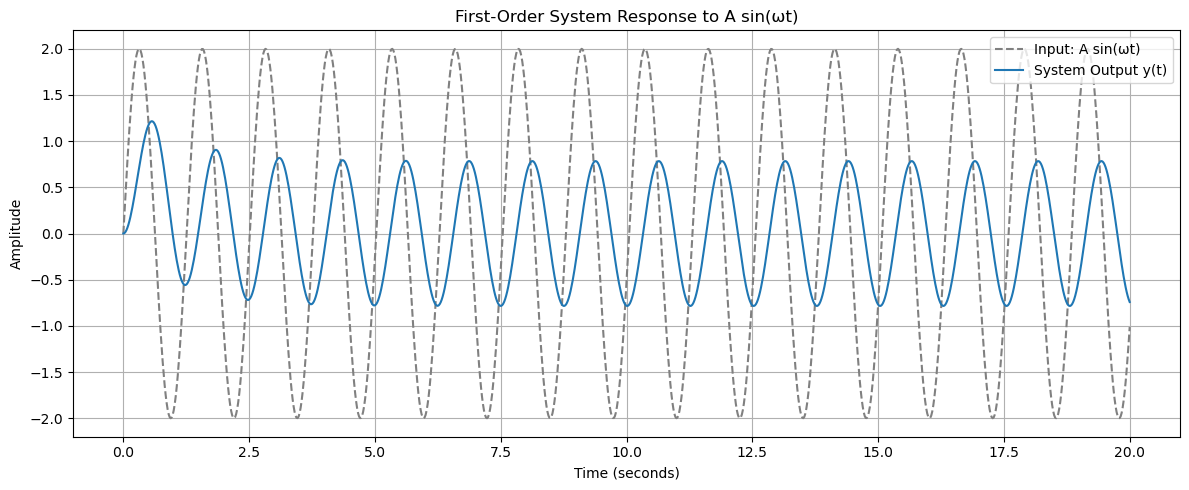

In [15]:
## This is the plot using the un-merged, 4-term y(t)
y_4term_transient = A/(2j)*(b/(-a-1j*w)-b/(-a+1j*w))*np.exp(-a*t)
y_4term_steady = A/(2j)*( b/(1j*w+a)*np.exp(1j*w*t) -  b/(a-1j*w)*np.exp(-1j*w*t))

y_4term = y_4term_transient + y_4term_steady

plt.figure(figsize=(12, 5))
plt.plot(t, x, label="Input: A sin(ωt)", color="gray", linestyle="--")
plt.plot(t, y_4term, label="System Output y(t)", color="tab:blue")
plt.title("First-Order System Response to A sin(ωt)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

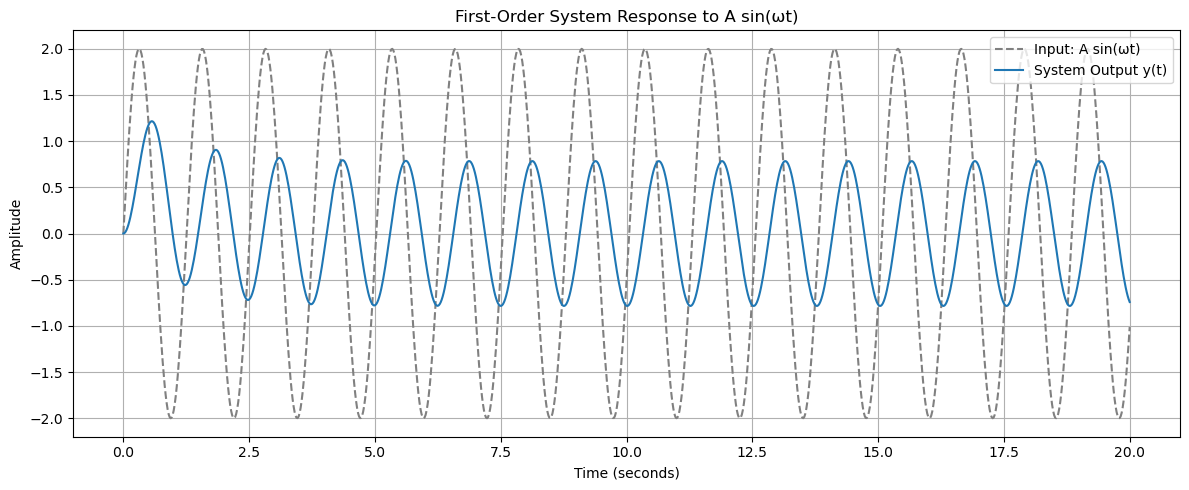

In [16]:
## This is the plot using the merged, 3-term y(t)
y_merged_transient = A/(2j)*(b/(-a-1j*w)-b/(-a+1j*w))*np.exp(-a*t)
y_merged_steady = A*b/np.sqrt(a**2+w**2) * np.sin(w*t - np.arctan(w/a))

y_merged = y_merged_transient + y_merged_steady

plt.figure(figsize=(12, 5))
plt.plot(t, x, label="Input: A sin(ωt)", color="gray", linestyle="--")
plt.plot(t, y_merged, label="System Output y(t)", color="tab:blue")
plt.title("First-Order System Response to A sin(ωt)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

**Both expressions work!** They achieve the same plots!


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>final answer: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Focus on the Steady State</h2>
</div>

In many applications involving sine signals, people are more interseted in the Steady State part. It is about how the system behaves in the long run under continuous excitation.

For your $y(t)$ in Task 1, you can see a sine term. This is the part determining your Steady State response. 

This sine term:
* Frequency (rad/s) is the same as input
* Amplitude is scaled to ???
* Phase shift becomes ??


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>fill ??: 1 pt</strong>
</span>

In fact, if you are familiar with complex math, we can see that
* The amplitude is just the magnitude of the $\frac{b}{j\omega+a}$
* The Phase shift is just the angle of the $\frac{b}{j\omega+a}$

**The form $\frac{b}{j\omega+a}$ exactly matches the form of transfer function $\frac{b}{s+a}$** 

-------

This gives us a convenient way to calculate steady state response of sine signals:

Every time you know the sine signal $x(t)=A\sin(\omega t)$, and system transfer function $\frac{b}{j\omega+a}$.
$A$, $\omega$, $b$, $a$ are known constants.

* First identify the $\omega$ value
* Second, plug $j\omega$ into the transfer function to replace $s$.
* Third, calculate the complex number $\frac{b}{j\omega+a}$
* Forth, calculate the magnitude and the angle of this complex number. These two will be the amplitude and phase shift of your y(t)'s steady state.
* Last, don't forget to scale by $A$.

-----------
For example:

* $x(t)=4\sin(3 t)$
* $H(s)=\frac{5}{s+2}$

In [14]:
# First identify w value
w = 3
# Second and Third, plug into Transfer Function and calculate
H_jw = 5/(1j*w+2)
# Forth, calculate magnitude and angle
example_mag = np.abs(H_jw)
example_angle = np.angle(H_jw)
##
example_mag = example_mag *4

print(example_mag, example_angle)

5.547001962252291 -0.9827937232473292


So the Steady State response of this will be:
$$5.55\sin(3t-0.983)$$

------------

Now, try to use method to calculate the Steady State response of Task 2.

Show Code and Result. Does the result match your previous plot in Task 2?

In [17]:
# Question answer
# First identify w value
w = 5
# Second and Third, plug into Transfer Function and calculate
H_jw = 2/(1j*w+1)
# Forth, calculate magnitude and angle
example_mag = np.abs(H_jw)
example_angle = np.angle(H_jw)
##
example_mag = example_mag *2

print(example_mag, example_angle)

0.7844645405527361 -1.373400766945016


**Answer:** So the Steady State response of this will be:
$$0.784\sin(5t-1.373)$$



<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Code and Result: 1 pt</strong>
</span>

<div style="border-left: 4px solid #008080; padding: 10px; background-color: #E5FFFF;">
<strong>[Note: ]</strong> In fact, such calculation approach in Task 3 not only works for first order system, but also works for systems in any order. We will continue to study it in Thursday.
</div>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


